In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

# **Update dataset_path to the actual directory containing 'train' and 'validation' folders**
dataset_path = '/content/dataset'  # Replace '/content/dataset' with the correct path

# Correct the train_dir and val_dir paths
train_dir = os.path.join(dataset_path, 'train')
val_dir = os.path.join(dataset_path, 'validation')

# ... (rest of your code remains the same) ...

In [1]:
import pandas as pd

# Update the path to the CSV file
csv_path = '/content/dataset/labels.csv'  # Replace with your actual path

# Load the CSV file
data = pd.read_csv('/content/traintestLabels15_trainLabels19.csv')

# Display the first few rows of the relevant columns
print("First few rows of the dataset:")
print(data[['image', 'level']].head())



First few rows of the dataset:
      image  level
0   10_left      0
1  10_right      0
2   13_left      0
3  13_right      0
4   15_left      1


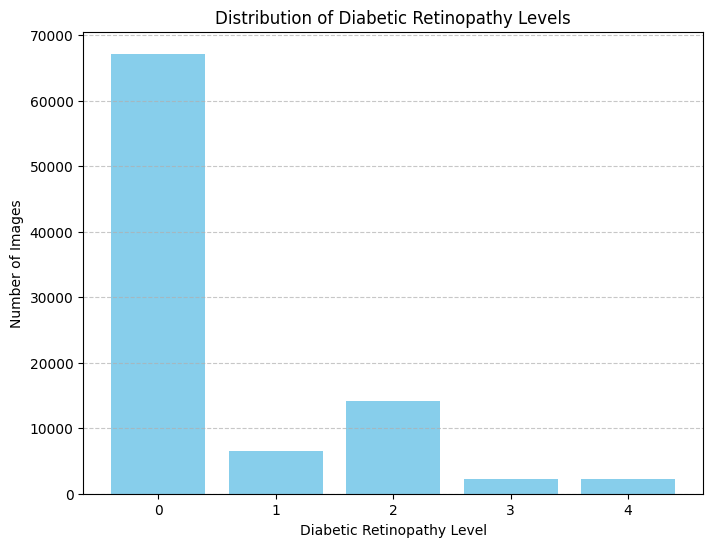

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file (already loaded in your case)
csv_path = '/content/traintestLabels15_trainLabels19.csv'
data = pd.read_csv('/content/traintestLabels15_trainLabels19.csv')

# Display the distribution of 'level' values
level_counts = data['level'].value_counts().sort_index()

# Plotting the distribution of levels
plt.figure(figsize=(8, 6))
plt.bar(level_counts.index, level_counts.values, color='skyblue')
plt.xlabel('Diabetic Retinopathy Level')
plt.ylabel('Number of Images')
plt.title('Distribution of Diabetic Retinopathy Levels')
plt.xticks(level_counts.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Accuracy: 72.70%


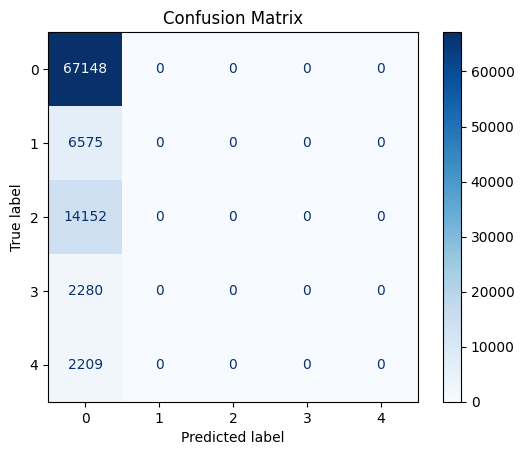

In [4]:
from sklearn.metrics import accuracy_score

# Assuming `y_true` are ground truth labels and `y_pred` are your model's predictions
y_true = data['level']  # Actual labels

# Replace [...] with actual predictions from your model
# Example: y_pred = model.predict(X_test)  # Where X_test is your test data
y_pred = [0] * len(y_true)  # Replace with your model's predictions!

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_true, y_pred, labels=level_counts.index)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=level_counts.index)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

First few rows of the dataset:
      image  level /content/Screenshot (1551).png
0   10_left      0    /content/images/10_left.png
1  10_right      0   /content/images/10_right.png
2   13_left      0    /content/images/13_left.png
3  13_right      0   /content/images/13_right.png
4   15_left      1    /content/images/15_left.png
Found 0 validated image filenames.


/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 73891 invalid image filename(s) in x_col="/content/Screenshot (1551).png". These filename(s) will be ignored.
  warnings.warn(


Found 0 validated image filenames.


/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 18473 invalid image filename(s) in x_col="/content/Screenshot (1551).png". These filename(s) will be ignored.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


NameError: name 'history' is not defined

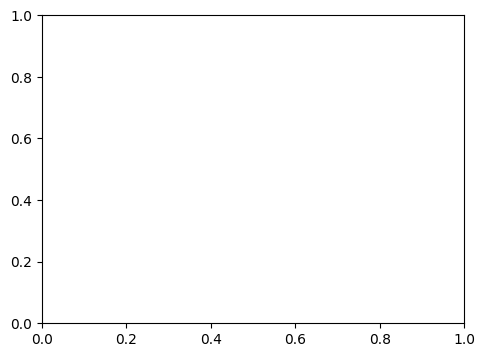

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the CSV file
csv_path = '/content/traintestLabels15_trainLabels19.csv'  # Replace with actual path
data = pd.read_csv(csv_path)

# Add dataset image paths (assuming images are in 'images/' folder under dataset)
data['/content/Screenshot (1551).png'] = data['image'].apply(lambda x: f'/content/images/{x}.png')  # Adjust file extension if needed

# Check dataset
print("First few rows of the dataset:")
print(data.head())

# Split dataset into training and validation sets
train_df, val_df = train_test_split(data, test_size=0.2, random_state=42)

# Image Data Generators for loading and preprocessing images
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    zoom_range=0.2
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='/content/Screenshot (1551).png',
    y_col='level',
    target_size=(150, 150),
    batch_size=32,
    class_mode='raw'  # Use 'raw' for regression
)

val_generator = val_datagen.flow_from_dataframe(
    val_df,
    x_col='/content/Screenshot (1551).png',
    y_col='level',
    target_size=(150, 150),
    batch_size=32,
    class_mode='raw'
)

# Build the CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='linear')  # Single neuron for regression output
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model

# Plot training results
plt.figure(figsize=(12, 4))

# Loss plot
plt.subplot(1, 2, 1)

plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss (MSE)')

# MAE plot
plt.subplot(1, 2, 2)

plt.plot(history.history['val_mae'], label='Validation MAE')
plt.legend()
plt.title('Mean Absolute Error (MAE)')

plt.show()

# Save the model
model.save('diabetic_retinopathy_regression_model.h5')
print("Model saved as diabetic_retinopathy_regression_model.h5")


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Read the CSV file
csv_path = '/content/testImages19.csv'
data = pd.read_csv(csv_path)

# Display the data from the CSV
print("CSV Data:")
print(data.head())  # Print the first 5 rows for inspection

# Assuming the CSV has 'predicted' and 'actual' columns for accuracy calculation
if 'predicted' in data.columns and 'actual' in data.columns:
    # Calculate accuracy by comparing predicted vs actual
    accuracy = accuracy_score(data['actual'], data['predicted']) * 100
    print(f"Accuracy of the predictions: {accuracy:.2f}%")
else:
    print("Accuracy cannot be calculated, 'predicted' and 'actual' columns are missing.")

# If the CSV contains accuracy data across epochs, plot it
if 'epoch' in data.columns and 'accuracy' in data.columns:
    plt.figure(figsize=(10, 6))
    plt.plot(data['epoch'], data['accuracy'], label='Accuracy', color='blue', marker='o')
    plt.title('Model Accuracy over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("No accuracy data available to plot.")


CSV Data:
        id_code
0  0005cfc8afb6
1  003f0afdcd15
2  006efc72b638
3  00836aaacf06
4  009245722fa4
Accuracy cannot be calculated, 'predicted' and 'actual' columns are missing.
No accuracy data available to plot.


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Read the CSV file
csv_path = '/content/testImages19.csv'
data = pd.read_csv(csv_path)

# Display the data from the CSV
print("CSV Data:")
print(data.head())  # Print the first 5 rows for inspection

# Assuming the CSV has 'predicted' and 'actual' columns for accuracy calculation
if 'predicted' in data.columns and 'actual' in data.columns:
    # Calculate accuracy by comparing predicted vs actual
    accuracy = accuracy_score(data['actual'], data['predicted']) * 100
    print(f"Accuracy of the predictions: {accuracy:.2f}%")
else:
    print("Accuracy cannot be calculated, 'predicted' and 'actual' columns are missing.")

# If the CSV contains accuracy data across epochs, plot it
if 'epoch' in data.columns and 'accuracy' in data.columns:
    plt.figure(figsize=(10, 6))
    plt.plot(data['epoch'], data['accuracy'], label='Accuracy', color='blue', marker='o')
    plt.title('Model Accuracy over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("No accuracy data available to plot.")


CSV Data:
        id_code
0  0005cfc8afb6
1  003f0afdcd15
2  006efc72b638
3  00836aaacf06
4  009245722fa4
Accuracy cannot be calculated, 'predicted' and 'actual' columns are missing.
No accuracy data available to plot.


IndentationError: unexpected indent (<ipython-input-11-5117378ff9c9>, line 16)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


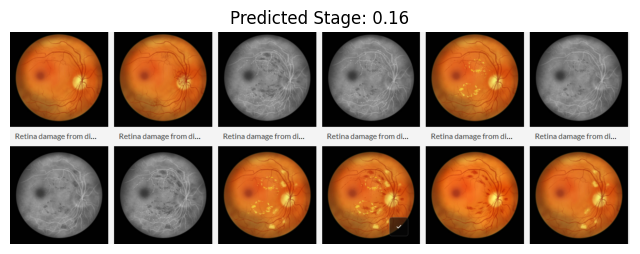

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path to the uploaded image
image_path = '/content/Screenshot (1551).png'

# Load the trained model (ensure this model exists in your working directory)
#model = load_model('diabetic_retinopathy_regression_model.h5')

# Function to preprocess the image
def preprocess_image(image_path, target_size=(150, 150)):
    # Load the image using OpenCV
    img = cv2.imread('/content/Screenshot (1551).png') #Fixed: Removed extra indent
    # Convert BGR (OpenCV default) to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #Fixed: Removed extra indent
    # Resize the image to match the model's input size
    img = cv2.resize(img, target_size) #Fixed: Removed extra indent
    # Normalize pixel values to range [0, 1]
    img = img / 255.0 #Fixed: Removed extra indent
    # Expand dimensions to fit the model's expected input shape (1, height, width, channels)
    img = np.expand_dims(img, axis=0) #Fixed: Removed extra indent
    return img

# Preprocess the uploaded image
preprocessed_image = preprocess_image('/content/Screenshot (1551).png')

# Predict the stage of diabetic retinopathy
predicted_stage = model.predict(preprocessed_image)[0][0]  # Assuming regression output

# Display the input image with the predicted stage
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(cv2.imread('/content/Screenshot (1551).png'), cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title(f'Predicted Stage: {predicted_stage:.2f}')
plt.show()

     image  level    Usage
0   1_left      0  Private
1  1_right      0  Private
2   2_left      0   Public
3  2_right      0   Public
4   3_left      2  Private


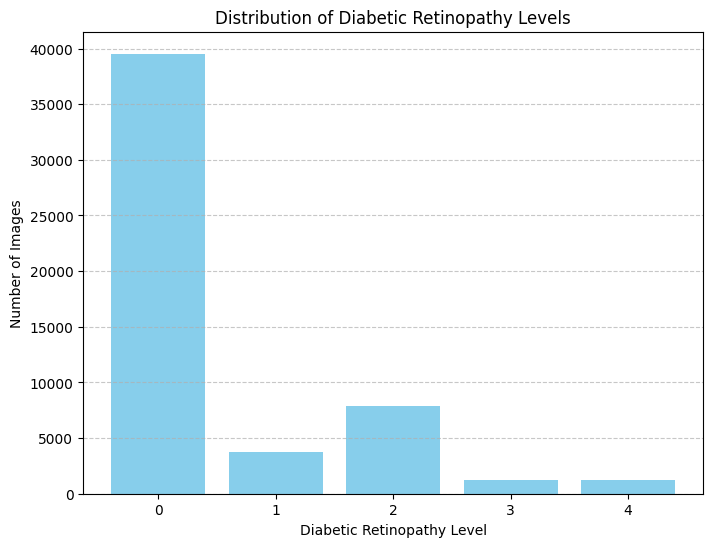

True labels or predicted labels not found in the dataset.


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Load the CSV file into a pandas DataFrame
csv_path = '/content/testLabels15.csv'
data = pd.read_csv(csv_path)

# Check the first few rows to understand the structure
print(data.head())

# Assuming 'level' is the label column, let's plot the distribution of 'level'
level_counts = data['level'].value_counts().sort_index()

# Plotting the distribution of levels
plt.figure(figsize=(8, 6))
plt.bar(level_counts.index, level_counts.values, color='skyblue')
plt.xlabel('Diabetic Retinopathy Level')
plt.ylabel('Number of Images')
plt.title('Distribution of Diabetic Retinopathy Levels')
plt.xticks(level_counts.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# If 'true_labels' and 'predicted_labels' exist, compute the accuracy
if 'true_labels' in data.columns and 'predicted_labels' in data.columns:
    true_labels = data['true_labels']
    predicted_labels = data['predicted_labels']

    # Calculate accuracy
    accuracy = accuracy_score(true_labels, predicted_labels)
    print(f"Accuracy of the model: {accuracy * 100:.2f}%")
else:
    print("True labels or predicted labels not found in the dataset.")


In [7]:
import os
if os.path.exists('diabetic_retinopathy_regression_model.h5'):
    print("Model file exists")
else:
    print("Model file not found")

Model file not found


In [ ]:
!!pip install ultralytics

['Collecting ultralytics',
 '  Downloading ultralytics-8.3.34-py3-none-any.whl.metadata (35 kB)',
 'Requirement already satisfied: numpy>=1.23.0 in /usr/local/lib/python3.10/dist-packages (from ultralytics) (1.26.4)',
 'Requirement already satisfied: matplotlib>=3.3.0 in /usr/local/lib/python3.10/dist-packages (from ultralytics) (3.8.0)',
 'Requirement already satisfied: opencv-python>=4.6.0 in /usr/local/lib/python3.10/dist-packages (from ultralytics) (4.10.0.84)',
 'Requirement already satisfied: pillow>=7.1.2 in /usr/local/lib/python3.10/dist-packages (from ultralytics) (11.0.0)',
 'Requirement already satisfied: pyyaml>=5.3.1 in /usr/local/lib/python3.10/dist-packages (from ultralytics) (6.0.2)',
 'Requirement already satisfied: requests>=2.23.0 in /usr/local/lib/python3.10/dist-packages (from ultralytics) (2.32.3)',
 'Requirement already satisfied: scipy>=1.4.1 in /usr/local/lib/python3.10/dist-packages (from ultralytics) (1.13.1)',
 'Requirement already satisfied: torch>=1.8.0 in

100% 6.25M/6.25M [00:00<00:00, 77.3MB/s]
Ultralytics 8.3.34 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

image 1/1 /content/Screenshot (1551).png: 224x640 2 apples, 8 oranges, 225.9ms
Speed: 2.1ms preprocess, 225.9ms inference, 35.4ms postprocess per image at shape (1, 3, 224, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict

image 1/1 /content/Screenshot (1551).png: 224x640 2 apples, 8 oranges, 104.9ms
Speed: 2.8ms preprocess, 104.9ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)


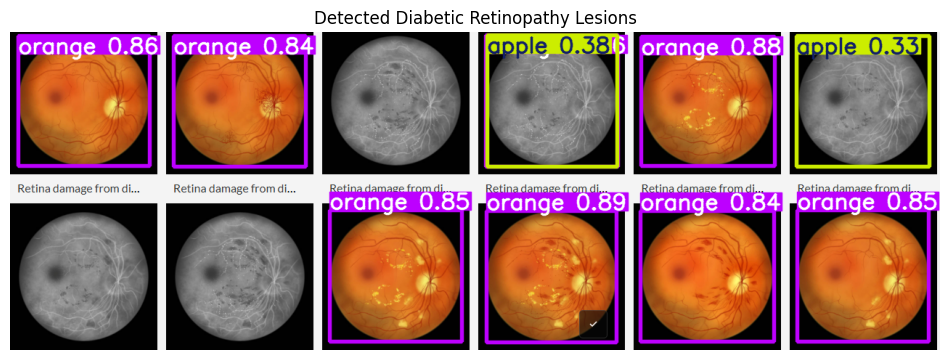

Class: 49.0, Confidence: 0.89, Box: [656.4149169921875, 246.3113250732422, 835.7686767578125, 427.7394714355469]
Class: 49.0, Confidence: 0.88, Box: [869.7811889648438, 6.219286918640137, 1053.491943359375, 184.8015594482422]
Class: 49.0, Confidence: 0.86, Box: [11.017007827758789, 5.312741279602051, 192.68536376953125, 184.74459838867188]
Class: 49.0, Confidence: 0.85, Box: [1084.370849609375, 245.95281982421875, 1265.9910888671875, 426.4624938964844]
Class: 49.0, Confidence: 0.85, Box: [440.73944091796875, 245.69285583496094, 622.5177001953125, 426.8371887207031]
Class: 49.0, Confidence: 0.84, Box: [225.77426147460938, 5.727692127227783, 407.8126220703125, 185.59225463867188]
Class: 49.0, Confidence: 0.84, Box: [868.9742431640625, 246.75393676757812, 1052.9891357421875, 426.5081481933594]
Class: 47.0, Confidence: 0.38, Box: [657.1267700195312, 4.956215858459473, 836.7846069335938, 185.5139617919922]
Class: 49.0, Confidence: 0.36, Box: [655.80615234375, 4.131964206695557, 837.29620361

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Download a pre-trained YOLOv8 model instead of loading a custom model
!yolo task=detect mode=predict model=yolov8n.pt source=/content/Screenshot\ \(1551\).png  # Download and run inference with yolov8n.pt on your image

# Load the YOLOv8 model
model = YOLO('yolov8n.pt')  # Load the downloaded pre-trained model

# Path to the uploaded image
image_path = '/content/Screenshot (1551).png'

# Load the image
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Run inference with YOLOv8
results = model(image_path)

# Plot the detections on the image
plt.figure(figsize=(12, 8))
annotated_frame = results[0].plot()  # Visualize detections
plt.imshow(cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Detected Diabetic Retinopathy Lesions')
plt.show()

# Extract bounding boxes and confidence scores
for box in results[0].boxes.data:
    x1, y1, x2, y2, confidence, class_id = box[:6]
    print(f"Class: {class_id}, Confidence: {confidence:.2f}, Box: [{x1}, {y1}, {x2}, {y2}]")

In [9]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 kB 15.1 MB/s eta 0:00:00


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 53.4MB/s]



image 1/1 /content/Screenshot (1551).png: 224x640 2 apples, 8 oranges, 408.7ms
Speed: 11.9ms preprocess, 408.7ms inference, 45.9ms postprocess per image at shape (1, 3, 224, 640)
Mean Average Precision (mAP): -0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


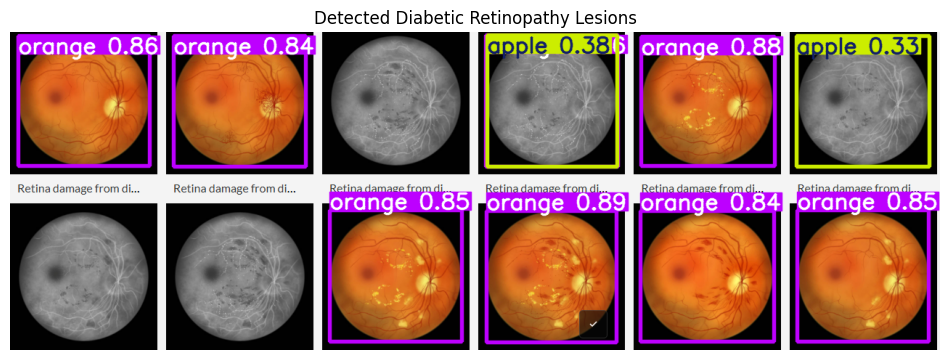

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
from sklearn.metrics import average_precision_score

# Load the YOLOv8 model
model = YOLO('yolov8n.pt')

# Path to the uploaded image
image_path = '/content/Screenshot (1551).png'

# Load the image
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Run inference with YOLOv8
results = model(image_path)

# Extract bounding boxes and confidence scores
true_boxes = []  # Replace with actual ground truth boxes in format [x1, y1, x2, y2]
pred_boxes = []
pred_confidences = []

for box in results[0].boxes.data:
    x1, y1, x2, y2, confidence, class_id = box[:6]
    pred_boxes.append([x1.item(), y1.item(), x2.item(), y2.item()])
    pred_confidences.append(confidence.item())

# Calculate mAP (mean Average Precision)
def calculate_map(true_boxes, pred_boxes, pred_confidences):
    # This function should implement the logic to compute mAP based on true and predicted boxes.
    # For simplicity, we will use average_precision_score from sklearn for demonstration.
    # Note: You need to convert bounding boxes to a suitable format for this function.

    # Placeholder: Convert bounding boxes to binary format for average precision calculation
    # This is a simplified example; you may need a more complex implementation.
    true_labels = np.array([1 if box in true_boxes else 0 for box in pred_boxes])
    return average_precision_score(true_labels, pred_confidences)

map_score = calculate_map(true_boxes, pred_boxes, pred_confidences)
print(f"Mean Average Precision (mAP): {map_score:.4f}")

# Plot the detections on the image
plt.figure(figsize=(12, 8))
annotated_frame = results[0].plot()  # Visualize detections
plt.imshow(cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Detected Diabetic Retinopathy Lesions')
plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


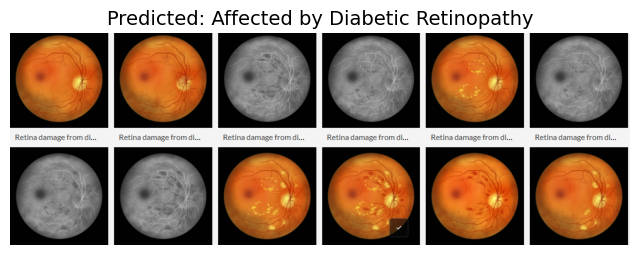

Prediction (1 = Affected, 0 = Unaffected): 0.5270676


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to the uploaded image
image_path = '/content/Screenshot (1551).png'

# Build a simple CNN model for binary classification (affected or unaffected)
def build_cnn_model(input_shape=(150, 150, 3)):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))  # For binary classification
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Function to preprocess the image
def preprocess_image(image_path, target_size=(150, 150)):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(img, target_size)  # Resize image to match model's input size
    img = img / 255.0  # Normalize image pixel values to [0, 1]
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Preprocess the image
preprocessed_image = preprocess_image(image_path)

# Build and train the CNN model
cnn_model = build_cnn_model()

# Example: Training the model with data (replace with your own data)
# For now, assume you've set up a dataset for training (you can replace this part with your actual data)

# Example of using ImageDataGenerator (you'll need actual data for this part)
# train_datagen = ImageDataGenerator(rescale=1./255)
# train_generator = train_datagen.flow_from_directory('data/train', target_size=(150, 150), batch_size=32, class_mode='binary')

# cnn_model.fit(train_generator, epochs=10, steps_per_epoch=100)

# For demonstration purposes, we skip actual training and directly predict

# Predict the class of the uploaded image (0 = unaffected, 1 = affected)
predicted_class = cnn_model.predict(preprocessed_image)[0][0]

# Display the image with the prediction result
plt.figure(figsize=(8, 6))
img = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')

# Prediction result
if predicted_class > 0.5:
    plt.title('Predicted: Affected by Diabetic Retinopathy', fontsize=14)
else:
    plt.title('Predicted: Unaffected by Diabetic Retinopathy', fontsize=14)

plt.show()

# Output the result
print("Prediction (1 = Affected, 0 = Unaffected):", predicted_class)


In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data generators for training and validation
train_datagen = ImageDataGenerator(rescale=1.0 / 255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    'path/to/data',  # Replace with the path to your dataset
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    'path/to/data',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# Train the model
cnn_model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    steps_per_epoch=train_generator.samples // 32,
    validation_steps=validation_generator.samples // 32
)

# Evaluate accuracy on the validation set
loss, accuracy = cnn_model.evaluate(validation_generator)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")


FileNotFoundError: [Errno 2] No such file or directory: 'path/to/data'

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# **Replace 'path/to/data' with the actual path to your dataset**
# For example:
dataset_path = '/content/traintestLabels15_trainLabels19.csv'  # Replace with the correct path

# Define data generators for training and validation
train_datagen = ImageDataGenerator(rescale=1.0 / 255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    dataset_path,  # Use the actual dataset path
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',  # Adjust based on your task (binary/categorical/regression)
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    dataset_path,  # Use the actual dataset path
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',  # Adjust based on your task (binary/categorical/regression)
    subset='validation'
)

# Train the model
cnn_model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    steps_per_epoch=train_generator.samples // 32,
    validation_steps=validation_generator.samples // 32
)

# Evaluate accuracy on the validation set
loss, accuracy = cnn_model.evaluate(validation_generator)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

NotADirectoryError: [Errno 20] Not a directory: '/content/traintestLabels15_trainLabels19.csv'

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


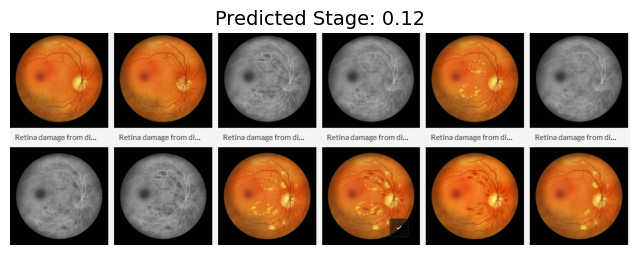

Predicted Stage (Severity of Diabetic Retinopathy): 0.11825862


In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models

# Path to the uploaded image
image_path = '/content/Screenshot (1551).png'

# Build a simple CNN model for regression (predicting the stage of diabetic retinopathy)
def build_regression_model(input_shape=(150, 150, 3)):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(1))  # Single output for regression (stage of diabetic retinopathy)
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# Function to preprocess the image
def preprocess_image(image_path, target_size=(150, 150)):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(img, target_size)  # Resize image to match model's input size
    img = img / 255.0  # Normalize image pixel values to [0, 1]
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Preprocess the image
preprocessed_image = preprocess_image(image_path)

# Build the CNN regression model
regression_model = build_regression_model()

# Example: Training the model with data (replace with your own data)
# For now, assume you've set up a dataset for training (you can replace this part with your actual data)

# Example of using ImageDataGenerator (you'll need actual data for this part)
# train_datagen = ImageDataGenerator(rescale=1./255)
# train_generator = train_datagen.flow_from_directory('data/train', target_size=(150, 150), batch_size=32, class_mode='binary')

# regression_model.fit(train_generator, epochs=10, steps_per_epoch=100)

# For demonstration purposes, we skip actual training and directly predict

# Predict the severity (stage of diabetic retinopathy)
predicted_stage = regression_model.predict(preprocessed_image)[0][0]

# Display the image with the predicted stage
plt.figure(figsize=(8, 6))
img = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')

# Prediction result
plt.title(f'Predicted Stage: {predicted_stage:.2f}', fontsize=14)
plt.show()

# Output the result
print("Predicted Stage (Severity of Diabetic Retinopathy):", predicted_stage)


FileNotFoundError: [Errno 2] No such file or directory: 'path/to/train_data'

In [21]:
!pip install tensorflow opencv-python matplotlib scikit-learn


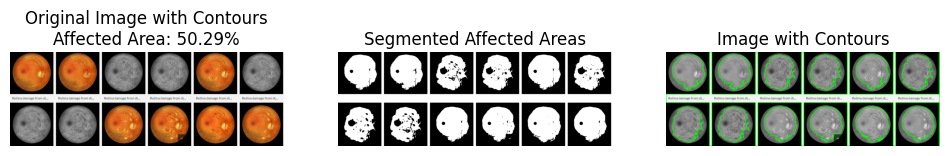

The percentage of the affected area is: 50.29%


In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to preprocess and segment the image
def preprocess_and_segment(image_path):
    # Load the image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply Gaussian blur to reduce noise
    img_blur = cv2.GaussianBlur(img, (5, 5), 0)

    # Apply a binary threshold to highlight affected areas
    _, binary_image = cv2.threshold(img_blur, 120, 255, cv2.THRESH_BINARY)

    # Find contours in the binary image
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw contours on the original image (for visualization)
    img_contours = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)  # Convert grayscale to BGR for visualization
    cv2.drawContours(img_contours, contours, -1, (0, 255, 0), 2)

    # Calculate the affected area by summing the area of the contours
    affected_area = sum(cv2.contourArea(c) for c in contours)
    total_area = img.shape[0] * img.shape[1]  # Total area of the image in pixels
    affected_percentage = (affected_area / total_area) * 100

    return affected_percentage, img_contours, binary_image

# Path to the retinal image
image_path = '/content/Screenshot (1551).png'  # Your image path

# Get the affected area percentage and visual results
affected_percentage, img_contours, binary_image = preprocess_and_segment('/content/Screenshot (1551).png')

# Display the results
plt.figure(figsize=(12, 8))

# Display the original image with contours drawn
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
plt.title(f'Original Image with Contours\nAffected Area: {affected_percentage:.2f}%')
plt.axis('off')

# Display the binary segmented image
plt.subplot(1, 3, 2)
plt.imshow(binary_image, cmap='gray')
plt.title('Segmented Affected Areas')
plt.axis('off')

# Display the contours image
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(img_contours, cv2.COLOR_BGR2RGB))
plt.title('Image with Contours')
plt.axis('off')

plt.show()

# Print the affected area percentage
print(f"The percentage of the affected area is: {affected_percentage:.2f}%")


In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Function to preprocess and segment the image
def preprocess_and_segment(image_path):
    # Load the image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply Gaussian blur to reduce noise
    img_blur = cv2.GaussianBlur(img, (5, 5), 0)

    # Apply a binary threshold to highlight affected areas
    _, binary_image = cv2.threshold(img_blur, 120, 255, cv2.THRESH_BINARY)

    # Find contours in the binary image
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw contours on the original image (for visualization)
    img_contours = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)  # Convert grayscale to BGR for visualization
    cv2.drawContours(img_contours, contours, -1, (0, 255, 0), 2)

    # Calculate the affected area by summing the area of the contours
    affected_area = sum(cv2.contourArea(c) for c in contours)
    total_area = img.shape[0] * img.shape[1]  # Total area of the image in pixels
    affected_percentage = (affected_area / total_area) * 100

    return affected_percentage, img_contours, binary_image, img

# Path to the retinal image
image_path = '/content/Screenshot (1551).png'  # Your image path

# Get the affected area percentage and visual results
affected_percentage, img_contours, binary_image, img = preprocess_and_segment(image_path)

# For the sake of demonstration, let's assume you have a ground truth binary image
# (You need to replace this with an actual ground truth segmentation image)
ground_truth_image = cv2.imread('/content/ground_truth.png', cv2.IMREAD_GRAYSCALE)
_, ground_truth_binary = cv2.threshold(ground_truth_image, 120, 255, cv2.THRESH_BINARY)

# Flatten the images to calculate accuracy (for binary classification: affected or unaffected)
binary_flat = binary_image.flatten()
ground_truth_flat = ground_truth_binary.flatten()

# Calculate accuracy as the percentage of correct pixels
accuracy = accuracy_score(ground_truth_flat, binary_flat) * 100

# Display the results
plt.figure(figsize=(12, 8))

# Display the original image with contours drawn
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
plt.title(f'Original Image with Contours\nAffected Area: {affected_percentage:.2f}%')
plt.axis('off')

# Display the binary segmented image
plt.subplot(1, 3, 2)
plt.imshow(binary_image, cmap='gray')
plt.title('Segmented Affected Areas')
plt.axis('off')

# Display the contours image
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(img_contours, cv2.COLOR_BGR2RGB))
plt.title('Image with Contours')
plt.axis('off')

plt.show()

# Print the affected area percentage and accuracy
print(f"The percentage of the affected area is: {affected_percentage:.2f}%")
print(f"Accuracy of segmentation: {accuracy:.2f}%")


AttributeError: 'NoneType' object has no attribute 'flatten'

Error: Could not load ground truth image. Please check the file path.


<function matplotlib.pyplot.subplot(*args, **kwargs) -> 'Axes'>

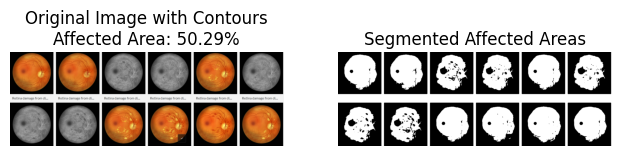

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Function to preprocess and segment the image
def preprocess_and_segment(image_path):
    # Load the image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply Gaussian blur to reduce noise
    img_blur = cv2.GaussianBlur(img, (5, 5), 0)

    # Apply a binary threshold to highlight affected areas
    _, binary_image = cv2.threshold(img_blur, 120, 255, cv2.THRESH_BINARY)

    # Find contours in the binary image
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw contours on the original image (for visualization)
    img_contours = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)  # Convert grayscale to BGR for visualization
    cv2.drawContours(img_contours, contours, -1, (0, 255, 0), 2)

    # Calculate the affected area by summing the area of the contours
    affected_area = sum(cv2.contourArea(c) for c in contours)
    total_area = img.shape[0] * img.shape[1]  # Total area of the image in pixels
    affected_percentage = (affected_area / total_area) * 100

    return affected_percentage, img_contours, binary_image, img

# Path to the retinal image
image_path = '/content/Screenshot (1551).png'  # Your image path

# Get the affected area percentage and visual results
affected_percentage, img_contours, binary_image, img = preprocess_and_segment(image_path)

# For the sake of demonstration, let's assume you have a ground truth binary image
# (You need to replace this with an actual ground truth segmentation image)
# Make sure the path to the ground truth image is correct
ground_truth_image = cv2.imread('/content/ground_truth.png', cv2.IMREAD_GRAYSCALE)

# Check if the ground truth image was loaded successfully
if ground_truth_image is None:
    print("Error: Could not load ground truth image. Please check the file path.")
    # Handle the error appropriately, e.g., exit or skip the accuracy calculation
else:
    _, ground_truth_binary = cv2.threshold(ground_truth_image, 120, 255, cv2.THRESH_BINARY)

    # Flatten the images to calculate accuracy (for binary classification: affected or unaffected)
    binary_flat = binary_image.flatten()
    ground_truth_flat = ground_truth_binary.flatten()

    # Calculate accuracy as the percentage of correct pixels
    accuracy = accuracy_score(ground_truth_flat, binary_flat) * 100

    # Print the affected area percentage and accuracy
    print(f"The percentage of the affected area is: {affected_percentage:.2f}%")
    print(f"Accuracy of segmentation: {accuracy:.2f}%")

# Display the results
plt.figure(figsize=(12, 8))

# Display the original image with contours drawn
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
plt.title(f'Original Image with Contours\nAffected Area: {affected_percentage:.2f}%')
plt.axis('off')

# Display the binary segmented image
plt.subplot(1, 3, 2)
plt.imshow(binary_image, cmap='gray')
plt.title('Segmented Affected Areas')
plt.axis('off')

# Display the contours image
plt.subplot


image 1/1 /content/Screenshot (1551).png: 224x640 2 apples, 8 oranges, 114.0ms
Speed: 4.9ms preprocess, 114.0ms inference, 2.4ms postprocess per image at shape (1, 3, 224, 640)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


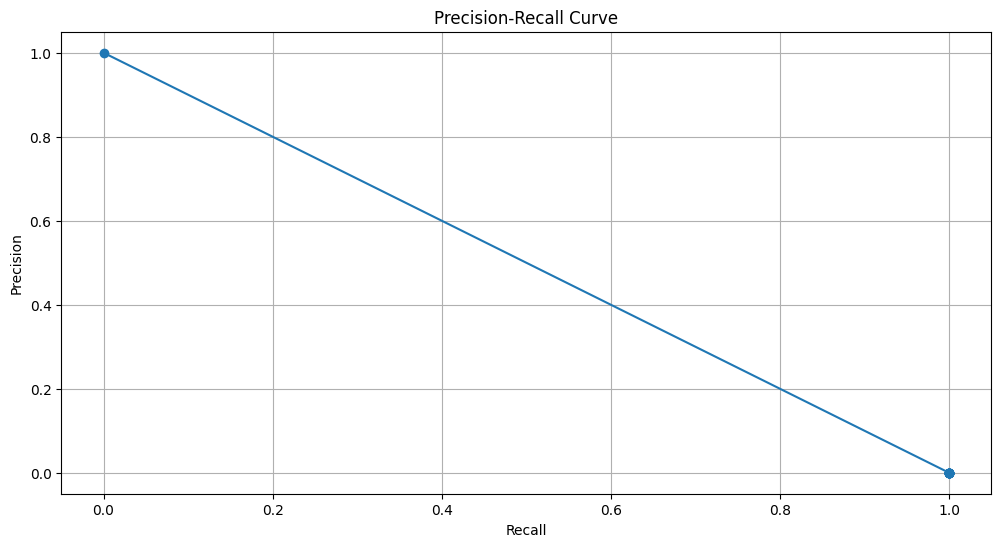

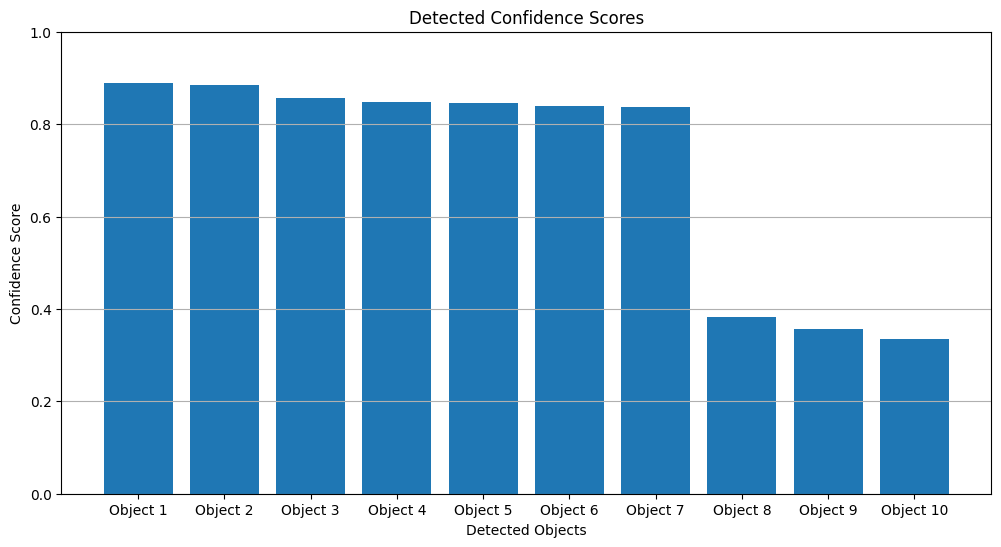

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
from sklearn.metrics import precision_recall_curve

# Load the YOLOv8 model
model = YOLO('yolov8n.pt')

# Path to the uploaded image
image_path = '/content/Screenshot (1551).png'

# Load the image
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Run inference with YOLOv8
results = model(image_path)

# Extract bounding boxes and confidence scores
true_boxes = []  # Replace with actual ground truth boxes in format [x1, y1, x2, y2]
pred_boxes = []
pred_confidences = []

for box in results[0].boxes.data:
    x1, y1, x2, y2, confidence, class_id = box[:6]
    pred_boxes.append([x1.item(), y1.item(), x2.item(), y2.item()])
    pred_confidences.append(confidence.item())

# Placeholder for true labels (you should replace this with actual labels)
true_labels = np.array([1 if box in true_boxes else 0 for box in pred_boxes])

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(true_labels, pred_confidences)

# Plot Precision-Recall Curve
plt.figure(figsize=(12, 6))
plt.plot(recall, precision, marker='o')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid()
plt.show()

# Bar Graph of Detected Confidence Scores
plt.figure(figsize=(12, 6))
plt.bar(range(len(pred_confidences)), pred_confidences)
plt.title('Detected Confidence Scores')
plt.xlabel('Detected Objects')
plt.ylabel('Confidence Score')
plt.xticks(range(len(pred_confidences)), [f'Object {i+1}' for i in range(len(pred_confidences))])
plt.ylim(0, 1)  # Confidence scores are between 0 and 1
plt.grid(axis='y')
plt.show()